# Recurrent neural networks (RNN) 


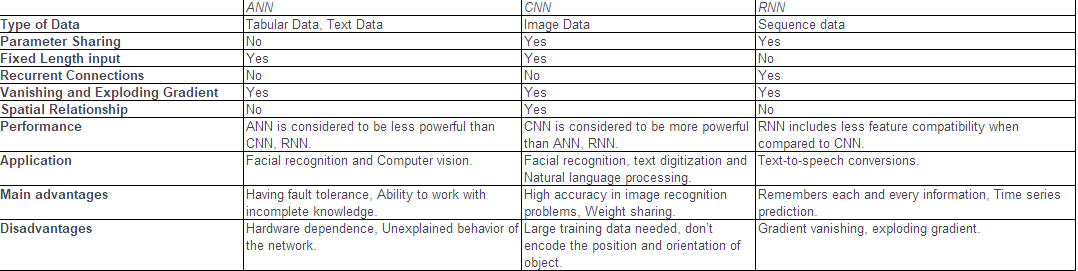

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM,Input

In [3]:
df = pd.read_csv("Lesson53-monthly-car-sales.csv",index_col=0)
df

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587
...,...
1968-08,16722
1968-09,14385
1968-10,21342


In [4]:
df1 = pd.read_csv("Lesson53-monthly-car-sales.csv")
df1

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [5]:
# split a univariate sequence into samples 

def split_sequence(sequence, n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):

        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X),np.array(y)
        

In [6]:
values = df.values
values

array([[ 6550],
       [ 8728],
       [12026],
       [14395],
       [14587],
       [13791],
       [ 9498],
       [ 8251],
       [ 7049],
       [ 9545],
       [ 9364],
       [ 8456],
       [ 7237],
       [ 9374],
       [11837],
       [13784],
       [15926],
       [13821],
       [11143],
       [ 7975],
       [ 7610],
       [10015],
       [12759],
       [ 8816],
       [10677],
       [10947],
       [15200],
       [17010],
       [20900],
       [16205],
       [12143],
       [ 8997],
       [ 5568],
       [11474],
       [12256],
       [10583],
       [10862],
       [10965],
       [14405],
       [20379],
       [20128],
       [17816],
       [12268],
       [ 8642],
       [ 7962],
       [13932],
       [15936],
       [12628],
       [12267],
       [12470],
       [18944],
       [21259],
       [22015],
       [18581],
       [15175],
       [10306],
       [10792],
       [14752],
       [13754],
       [11738],
       [12181],
       [12965],
       [

In [7]:
n_steps = 5

X,y = split_sequence(values, n_steps)

X

array([[[ 6550],
        [ 8728],
        [12026],
        [14395],
        [14587]],

       [[ 8728],
        [12026],
        [14395],
        [14587],
        [13791]],

       [[12026],
        [14395],
        [14587],
        [13791],
        [ 9498]],

       [[14395],
        [14587],
        [13791],
        [ 9498],
        [ 8251]],

       [[14587],
        [13791],
        [ 9498],
        [ 8251],
        [ 7049]],

       [[13791],
        [ 9498],
        [ 8251],
        [ 7049],
        [ 9545]],

       [[ 9498],
        [ 8251],
        [ 7049],
        [ 9545],
        [ 9364]],

       [[ 8251],
        [ 7049],
        [ 9545],
        [ 9364],
        [ 8456]],

       [[ 7049],
        [ 9545],
        [ 9364],
        [ 8456],
        [ 7237]],

       [[ 9545],
        [ 9364],
        [ 8456],
        [ 7237],
        [ 9374]],

       [[ 9364],
        [ 8456],
        [ 7237],
        [ 9374],
        [11837]],

       [[ 8456],
        [ 7237],
        [

In [8]:
X.shape

(103, 5, 1)

In [9]:
n_test = 12   #split every 12 months 
X_train,X_test,y_train,y_test = X[:-n_test],X[-n_test:],y[:-n_test],y[-n_test:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((91, 5, 1), (12, 5, 1), (91, 1), (12, 1))

In [10]:
#define model 
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(n_steps,1)))

model.add(LSTM(100,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(50,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(50,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(1))

model.compile(optimizer = "adam",loss="mse",metrics=["mae"])

In [11]:
model.fit(X_train,y_train, epochs = 300,batch_size=32,verbose=1,validation_data=(X_test,y_test))

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 1234507776.0000 - mae: 30325.3633 - val_loss: 523578368.0000 - val_mae: 17783.2578
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 338093216.0000 - mae: 14175.4092 - val_loss: 175724288.0000 - val_mae: 12328.8877
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 172980048.0000 - mae: 11518.0938 - val_loss: 294965856.0000 - val_mae: 16730.9531
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 182803104.0000 - mae: 11842.4561 - val_loss: 273320320.0000 - val_mae: 15726.9727
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 157250672.0000 - mae: 10682.8320 - val_loss: 155648576.0000 - val_mae: 11609.0771
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 110057560.0000 - mae: 8492.4355 - val_loss: 126340224.0000 - val_mae: 8573.8594
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 87467184.0000 - mae: 7115.7939 - val_loss: 94397336.0000 - val_mae: 7935.6655
Epoch 8/300
3/3 ━━━━━━━━

In [12]:
mse,mae = model.evaluate(X_test,y_test,verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10868328.0000 - mae: 2800.0925


In [13]:
# predict

row = np.array([[18204,16722,14385,21342,17178]])
yhat = model.predict(row)
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[16946.236]], dtype=float32)